# Segmenting and Clustering Neighborhoods in Toronto
_By Alina Sansevich_
***

## Instructions &rarr; DELETE THIS CELL BEFORE SUBMIT

In this assignment, you will be required to explore, segment, and cluster the neighborhoods in the city of Toronto based on the postalcode and borough information.. However, unlike New York, the neighborhood data is not readily available on the internet. What is interesting about the field of data science is that each project can be challenging in its unique way, so you need to learn to be agile and refine the skill to learn new libraries and tools quickly depending on the project.

For the Toronto neighborhood data, a Wikipedia page exists that has all the information we need to explore and cluster the neighborhoods in Toronto. You will be required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas  dataframe so that it is in a structured format like the New York dataset.

Once the data is in a structured format, you can replicate the analysis that we did to the New York City dataset to explore and cluster the neighborhoods in the city of Toronto.

Your submission will be a link to your Jupyter Notebook on your Github repository.

### Review criteria

This assignment will be graded by other peers who are completing this course during the same session. This assignment is worth 15% of your total grade.

You can prepare one notebook for all three parts, but please use Markdown to clearly label your work for each part in order to make it easy for your peers to grade your work. However, you will have to submit the notebook three times since a submission has to be associated with each question. Sorry about that.

Please check the My Submission section before you start working on the assignment.

https://www.coursera.org/learn/applied-data-science-capstone/discussions/all/threads/kBaFtPNGSHGWhbTzRohxtQ
@Josh: see to the upper right corner of the wiki page. There you'll see the tab view history. There you'll find all versions before. Use that one from Feb 2020 and you'll see that postcode, boroughs and neighborhoods are in dedicated columns and not within same cell. Once you've selected just copy from broswer adress  cell the actual address and use it for you url command line python.
***

## 1. Scrape Toronto's Wikipedia page

# Hints for Scraping Notebook

### Tips for  Webscraping Updated Table in Week3 Peer Graded Assignment

    **After retreiving the URL and creating a Beautiful soup object** 

     **Firstly create a list**  

     **Later after finding the table and table data  create a dictionary called cell having 3 keys PostalCode, Borough and Neighborhood.**

    **As postal code contains upto 3 characters extract that using tablerow.p.text**

     **Next use split ,strip and replace functions for getting Borough and Neighborhood information.**.

     **Append to the list**  

     **Create a dataframe with list**

In [ ]:
## Sample code

```python
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
```

# HERE STARTS MY WORK:

In [1]:
import requests
import os
import pandas as pd
from bs4 import BeautifulSoup

pd.set_option('display.max_rows', 10)

In [2]:
# retrieve the URL and create a BeautifulSoup object
url = 'https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=942655364'
toronto_wiki = requests.get(url)
soup = BeautifulSoup(toronto_wiki.content, "lxml")

table = soup.find_all('table')[0]
df = pd.read_html(str(table))
neighborhoods = pd.DataFrame(df[0])
neighborhoods.rename(columns={'Postcode': 'PostalCode', 'Borough': 'Borough', 'Neighbourhood': 'Neighborhood'}, inplace=True)
neighborhoods

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


## Data Cleaning

#### Instructions:
#### Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [3]:
# drop all rows that meet the condition: neighborhoods['Borough'] == 'Not assigned'
neighborhoods.drop(neighborhoods[neighborhoods['Borough'] == 'Not assigned'].index, inplace=True)
neighborhoods

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
...,...,...,...
281,M8Z,Etobicoke,Kingsway Park South West
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West


***

#### Instructions:
#### More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table

In [4]:
neighborhoods = neighborhoods.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(', '.join).reset_index()

In [5]:
neighborhoods

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv..."
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ..."


#### Instructions:
#### If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [6]:
neighborhoods[neighborhoods['Neighborhood'] == 'Not assigned']

,PostalCode,Borough,Neighborhood


In [7]:
'Not assigned' in pd.unique(neighborhoods['Neighborhood'])

False

There are no 'Not assigned' values in the 'Neighborhood' column.

#### Instructions:
#### Use the .shape method to print the number of rows of your dataframe

In [8]:
neighborhoods.shape

(103, 3)

#### Instructions:
#### Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.

## My assumptions:

In the image shown in the instructions there are only 12 rows, where we can see repeated values in the 'Boroughs' column, but not in the 'PostalCodes' column.

So, to re-create that dataframe:

    - I dropped the rows with a value of 'Not assigned' for the 'Borough' column
    - I grouped by 'PostalCode' and 'Borough', and joined in 1 row the 'Neighborhood' values

My final dataframe has 103 rows and 3 columns, one row for each assigned PostalCode. 

&rarr; I understand that this is the complete dataset with which we are supposed to continue working (and NOT only the 12 rows in the shown dataframe), so with this data I continue my analysis.

***
## SUBMIT HERE
***

## 2. Clean Data and read it into a dataframe &rarr; structured format like the New York dataset

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. 

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking  postal code M5G as an example, your code would look something like this:

In [9]:
import geocoder # import geocoder REMOVE THIS!!!!!!!!!!!!!!!!!!!!!!!

In [9]:
# initialize your variable to None REMOVE THIS!!!!!!!!!!!!!!!!!!!!!!!
# lat_lng_coords = None

# # loop until you get the coordinates
# while(lat_lng_coords is None):
#   g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
#   lat_lng_coords = g.latlng

# latitude = lat_lng_coords[0]
# longitude = lat_lng_coords[1]

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code:

`Geospatial_Coordinates.csv`

Use the Geocoder package __or__ the csv file to create the following dataframe:

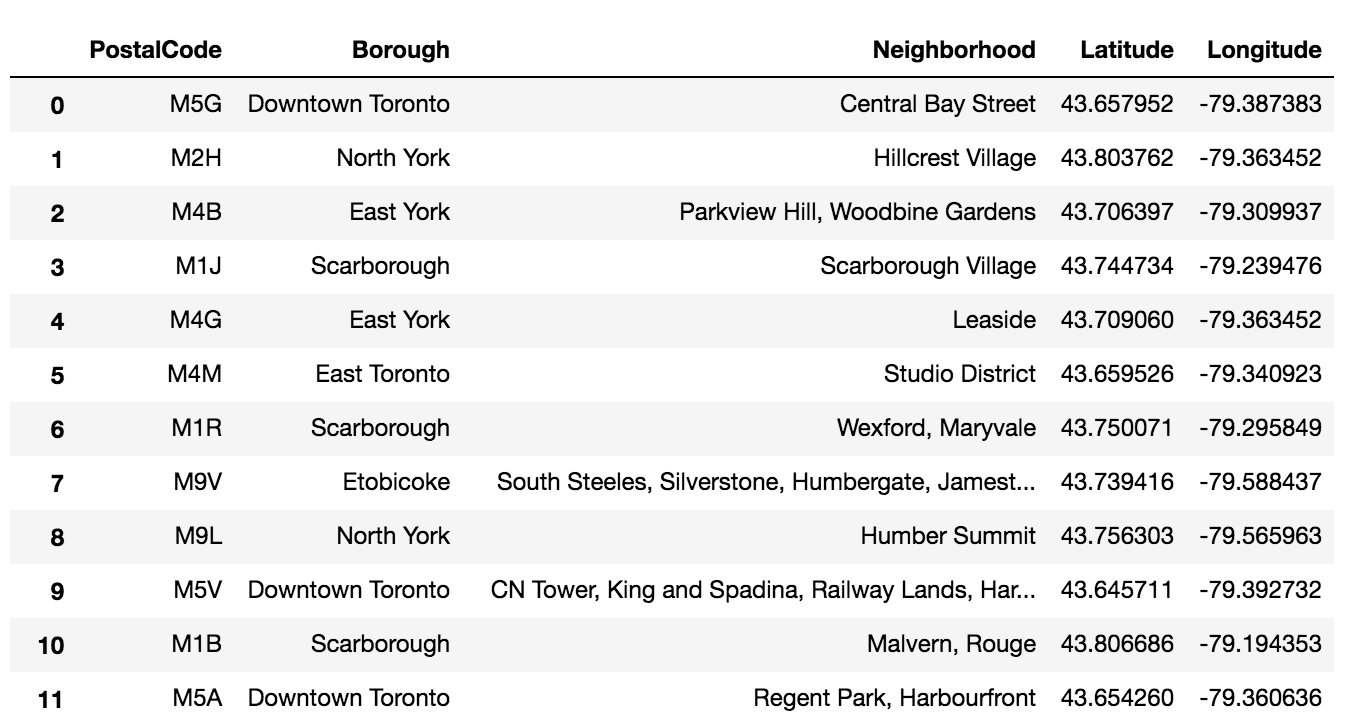

Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)

Note: While including the link do not copy paste the URL. Use the embedded link option in the formatting  tools of the Response field to include the link. Check the  displayed in image below

In [10]:
coordinates = pd.read_csv('Geospatial_Coordinates.csv')
coordinates.rename(columns={'Postal Code': 'PostalCode', 'Latitude': 'Latitude', 'Longitude': 'Longitude'}, inplace=True)
coordinates

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [11]:
neighborhoods = neighborhoods.merge(coordinates, how='inner', on='PostalCode')

In [12]:
neighborhoods

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437


***
## SUBMIT HERE
***

## 3. Replicate the analysis: New York City dataset &rarr; explore and cluster the neighborhoods of Toronto

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you. 

Just make sure:

    to add enough Markdown cells to explain what you decided to do and to report any observations you make. 
    to generate maps to visualize your neighborhoods and how they cluster together. 

Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (3 marks)

***
## SUBMIT HERE
***

In [13]:
import numpy as np
import json

# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values ###### DO I NEED THIS???

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [14]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        len(neighborhoods['Neighborhood'].unique())
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


In [16]:
# !conda install -c conda-forge geopy --yes

In [15]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [16]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of the city of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of the city of Toronto are 43.6534817, -79.3839347.


In [23]:
# Assign colors to the different boroughs in a new column named 'MarkerColor'
boroughs = list(neighborhoods['Borough'])

marker_color = []

for borough in boroughs:
    if borough == 'Scarborough':
        marker_color.append('red')
    elif borough == 'North York':
        marker_color.append('blue')
    elif borough == 'East York':
        marker_color.append('orange')
    elif borough == 'East Toronto':
        marker_color.append('black')
    elif borough == 'Central Toronto':
        marker_color.append('green')
    elif borough == 'Downtown Toronto':
        marker_color.append('lightgreen')
    elif borough == 'York':
        marker_color.append('darkblue')
    elif borough == 'West Toronto':
        marker_color.append('purple')
    elif borough == 'Mississauga':
        marker_color.append('pink')  
    elif borough == 'Etobicoke':
        marker_color.append('gray')

neighborhoods['MarkerColor'] = marker_color
neighborhoods

,PostalCode,Borough,Neighborhood,Latitude,Longitude,MarkerColor
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,red
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,red
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,red
3,M1G,Scarborough,Woburn,43.770992,-79.216917,red
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,red
...,...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188,darkblue
99,M9P,Etobicoke,Westmount,43.696319,-79.532242,gray
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,gray
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,gray


In [24]:
# create map of Toronto using latitude and longitude values,
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood, markercolor in zip(neighborhoods['Latitude'], 
                                                        neighborhoods['Longitude'], 
                                                        neighborhoods['Borough'], 
                                                        neighborhoods['Neighborhood'],
                                                        neighborhoods['MarkerColor']
                                                       ):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=markercolor,
        fill=True,
        fill_color=markercolor,
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

map_toronto

In [25]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'OC30BIT0T1C1DAJAXAUJGG1H3MQ1XOOZULL5ZWMARRVZFR0K' # your Foursquare ID
CLIENT_SECRET = 'NGO53AGQLJYHRMVAADNXU2QXJX1SLPK5M3HSMNTOWZQUMJZY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

Let's explore the first neighborhood in our dataframe.

In [26]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rouge, Malvern are 43.8066863, -79.1943534.


Now, let's get the top 100 venues that are in Rouge, Malvern within a radius of 500 meters.

In [27]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
# display URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=OC30BIT0T1C1DAJAXAUJGG1H3MQ1XOOZULL5ZWMARRVZFR0K&client_secret=NGO53AGQLJYHRMVAADNXU2QXJX1SLPK5M3HSMNTOWZQUMJZY&v=20180605&ll=43.8066863,-79.1943534&radius=500&limit=100'

In [28]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60a9664e004a627ae779c688'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 43.811186304500005,
    'lng': -79.1881295807304},
   'sw': {'lat': 43.8021862955, 'lng': -79.20057721926959}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': 'Wendy’s',
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'dis

In [29]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
venues = results['response']['groups'][0]['items']
# flatten JSON
nearby_venues = json_normalize(venues)
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]
# extract category name for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns' names
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/alina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Wendy’s,Fast Food Restaurant,43.807448,-79.199056


In [31]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

1 venues were returned by Foursquare.


### Explore Neighborhoods in Toronto
Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    """ names, latitudes, longitudes are columns from a dataframe. """
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude',
                  'Neighborhood Longitude',
                  'Venue',
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
# Run the above function on each neighborhood and create a new dataframe called toronto_venues.
toronto_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'])

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [34]:
print(toronto_venues.shape)
toronto_venues.head()

(2136, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,History Museum
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


In [48]:
# Let's check how many venues were returned for each neighborhood
pd.set_option('display.max_rows', None)
toronto_venues_grouped = toronto_venues.groupby('Neighborhood').count().reset_index()
toronto_venues_grouped.sort_values('Venue', ascending=False).head(50)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
27,"Commerce Court, Victoria Hotel",100,100,100,100,100,100
78,"Ryerson, Garden District",100,100,100,100,100,100
32,"Design Exchange, Toronto Dominion Centre",100,100,100,100,100,100
44,"First Canadian Place, Underground city",100,100,100,100,100,100
51,"Harbourfront East, Toronto Islands, Union Station",100,100,100,100,100,100
81,Stn A PO Boxes 25 The Esplanade,100,100,100,100,100,100
0,"Adelaide, King, Richmond",94,94,94,94,94,94
80,St. James Town,82,82,82,82,82,82
22,Church and Wellesley,76,76,76,76,76,76
43,"Fairview, Henry Farm, Oriole",65,65,65,65,65,65


In [49]:
print(toronto_venues_grouped.shape)
toronto_venues_grouped.sort_values('Venue', ascending=False).tail(40)

(99, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
94,Willowdale West,6,6,6,6,6,6
90,Victoria Village,6,6,6,6,6,6
40,"East Birchmount Park, Ionview, Kennedy Park",6,6,6,6,6,6
37,Downsview Northwest,5,5,5,5,5,5
67,"Moore Park, Summerhill East",5,5,5,5,5,5
47,Glencairn,5,5,5,5,5,5
38,Downsview West,5,5,5,5,5,5
1,Agincourt,5,5,5,5,5,5
54,Hillcrest Village,5,5,5,5,5,5
33,Don Mills North,5,5,5,5,5,5


For almost half of all neighborhoods the number of venues returned is in the single digits. @@@@@@@@@@@@@ 


Let's find out how many unique categories can be curated from all the returned venues

In [50]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 275 uniques categories.


In [51]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [52]:
toronto_onehot.shape

(2136, 275)

In [56]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
pd.set_option('display.max_rows', 10)

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.010638,0.0,0.0,0.0,0.0,0.0,0.0
1,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Willowdale West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
95,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
96,"Woodbine Gardens, Parkview Hill",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
97,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


I am interested in finding which neighborhoods have more Yoga Studios, since I would like to move an area were I could practice different styles of Yoga to find which one I like the most.

In [79]:
toronto_grouped_ys = toronto_grouped[['Neighborhood', 'Yoga Studio']]
toronto_grouped_ys

,Neighborhood,Yoga Studio
0,"Adelaide, King, Richmond",0.0
1,Agincourt,0.0
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.0
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.0
4,"Alderwood, Long Branch",0.0
...,...,...
94,Willowdale West,0.0
95,Woburn,0.0
96,"Woodbine Gardens, Parkview Hill",0.0
97,Woodbine Heights,0.0


In [80]:
# Let's confirm the new size
toronto_grouped_ys.shape

(99, 2)

Let's print each neighborhood along with the top 5 most common venues @@@@@@@@@@@@@

In [58]:
# @@@@@@@@@@@@@@@@@@
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
             venue  freq
0      Coffee Shop  0.11
1             Café  0.05
2  Thai Restaurant  0.04
3       Restaurant  0.04
4   Clothing Store  0.03


----Agincourt----
                       venue  freq
0  Latin American Restaurant   0.2
1                     Lounge   0.2
2             Breakfast Spot   0.2
3               Skating Rink   0.2
4             Clothing Store   0.2


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                venue  freq
0        Intersection  0.33
1          Playground  0.33
2                Park  0.33
3  Miscellaneous Shop  0.00
4               Motel  0.00


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
            venue  freq
0   Grocery Store  0.22
1     Pizza Place  0.11
2  Sandwich Place  0.11
3        Pharmacy  0.11
4      Beer Store  0.11


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.25
1  Sand

Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [59]:
# @@@@@@@@@@@@@@@@@@
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [60]:
# @@@@@@@@@@@@@@@@@@
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Restaurant,Clothing Store,Hotel,Gym,Deli / Bodega,Sushi Restaurant,Seafood Restaurant
1,Agincourt,Latin American Restaurant,Lounge,Breakfast Spot,Skating Rink,Clothing Store,Middle Eastern Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Intersection,Playground,Park,Miscellaneous Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Pizza Place,Sandwich Place,Pharmacy,Beer Store,Liquor Store,Fried Chicken Joint,Fast Food Restaurant,Optical Shop,Opera House
4,"Alderwood, Long Branch",Pizza Place,Sandwich Place,Gym,Playground,Pool,Coffee Shop,Pub,Yoga Studio,Mobile Phone Shop,Moroccan Restaurant


### 4. Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters

In [81]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped_ys.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(len(kmeans.labels_))
kmeans.labels_

99


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 4, 0, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [82]:
# add clustering labels
toronto_grouped_ys.insert(0, 'Cluster Labels', kmeans.labels_, allow_duplicates=True)

toronto_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_grouped_ys.set_index('Neighborhood'), on='Neighborhood')

toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,MarkerColor,Cluster Labels,Yoga Studio
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,red,1.0,0.0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,red,1.0,0.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,red,1.0,0.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,red,1.0,0.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,red,1.0,0.0
...,...,...,...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188,darkblue,1.0,0.0
99,M9P,Etobicoke,Westmount,43.696319,-79.532242,gray,1.0,0.0
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,gray,1.0,0.0
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,gray,1.0,0.0


In [62]:
#@@@@@@@@@@@@@@@@@@@@@@@
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_, allow_duplicates=True)

toronto_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,MarkerColor,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,red,1.0,Fast Food Restaurant,Yoga Studio,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,red,0.0,History Museum,Bar,Yoga Studio,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Miscellaneous Shop
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,red,0.0,Electronics Store,Restaurant,Intersection,Donut Shop,Bank,Medical Center,Mexican Restaurant,Breakfast Spot,Middle Eastern Restaurant,Miscellaneous Shop
3,M1G,Scarborough,Woburn,43.770992,-79.216917,red,0.0,Coffee Shop,Korean BBQ Restaurant,Yoga Studio,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Miscellaneous Shop
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,red,0.0,Gas Station,Bank,Caribbean Restaurant,Hakka Restaurant,Thai Restaurant,Athletics & Sports,Bakery,Fried Chicken Joint,Molecular Gastronomy Restaurant,Motel


In [63]:
#@@@@@@@@@@@@@@@@
toronto_merged = toronto_merged.loc[:,~toronto_merged.columns.duplicated()]
toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,MarkerColor,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,red,1.0,Fast Food Restaurant,Yoga Studio,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,red,0.0,History Museum,Bar,Yoga Studio,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Miscellaneous Shop
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,red,0.0,Electronics Store,Restaurant,Intersection,Donut Shop,Bank,Medical Center,Mexican Restaurant,Breakfast Spot,Middle Eastern Restaurant,Miscellaneous Shop
3,M1G,Scarborough,Woburn,43.770992,-79.216917,red,0.0,Coffee Shop,Korean BBQ Restaurant,Yoga Studio,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Miscellaneous Shop
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,red,0.0,Gas Station,Bank,Caribbean Restaurant,Hakka Restaurant,Thai Restaurant,Athletics & Sports,Bakery,Fried Chicken Joint,Molecular Gastronomy Restaurant,Motel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188,darkblue,2.0,Park,Jewelry Store,Yoga Studio,Middle Eastern Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant
99,M9P,Etobicoke,Westmount,43.696319,-79.532242,gray,0.0,Playground,Coffee Shop,Middle Eastern Restaurant,Sandwich Place,Discount Store,Intersection,Chinese Restaurant,Pizza Place,Optical Shop,Opera House
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,gray,2.0,Pizza Place,Park,Bus Line,Sandwich Place,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,gray,0.0,Grocery Store,Pizza Place,Sandwich Place,Pharmacy,Beer Store,Liquor Store,Fried Chicken Joint,Fast Food Restaurant,Optical Shop,Opera House


In [83]:
toronto_merged['Cluster Labels'].isnull().values.any()

True

In [84]:
toronto_merged['Cluster Labels'].isnull().sum()

4

In [85]:
toronto_merged['Cluster Labels'].isnull().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False])

I found 4 NaN values in the 'Cluster Labels' column, I will drop those rows before completing this part of the analysis:

In [86]:
toronto_merged.dropna(subset=['Cluster Labels'], inplace=True)

In [87]:
toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,MarkerColor,Cluster Labels,Yoga Studio
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,red,1.0,0.0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,red,1.0,0.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,red,1.0,0.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,red,1.0,0.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,red,1.0,0.0
...,...,...,...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188,darkblue,1.0,0.0
99,M9P,Etobicoke,Westmount,43.696319,-79.532242,gray,1.0,0.0
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,gray,1.0,0.0
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,gray,1.0,0.0


In [88]:
# Change 'Cluster Labels' data type from float to int
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)

In [89]:
toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,MarkerColor,Cluster Labels,Yoga Studio
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,red,1,0.0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,red,1,0.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,red,1,0.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,red,1,0.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,red,1,0.0
...,...,...,...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188,darkblue,1,0.0
99,M9P,Etobicoke,Westmount,43.696319,-79.532242,gray,1,0.0
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,gray,1,0.0
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,gray,1,0.0


Finally, let's visualize the resulting clusters

In [90]:
# create map
toronto_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
# ys = [i + x + (i*x)**2 for i in range(kclusters)] # is this line necessary????? REMOVE!!!!!!!!!!!!!!!!!!
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(toronto_map_clusters)
       
toronto_map_clusters

# The map might not be visible on Github. Check out the README for the map.

## 5. Examine Clusters &rarr; I'm here!

Text(0.5, 1.0, 'Average Number of Yoga Studios per Cluster')

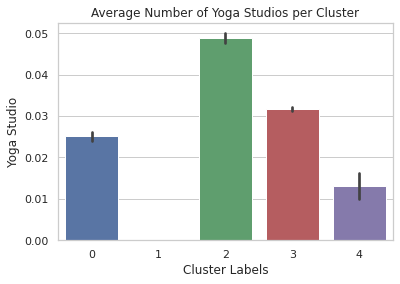

In [106]:
# avg number yoga studio vs cluster
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Cluster Labels", y="Yoga Studio", data=toronto_merged)
ax.set_title("Average Number of Yoga Studios per Cluster")

Cluster number 2 is the cluster with more yoga studios, followed by clusters number 3 and 0. Let's see how many neighborhoods are there in each cluster:

In [129]:
neighborhoods_cluster = toronto_merged[['Neighborhood', 'Cluster Labels', 'Yoga Studio']]
neighborhoods_cluster

,Neighborhood,Cluster Labels,Yoga Studio
0,"Rouge, Malvern",1,0.0
1,"Highland Creek, Rouge Hill, Port Union",1,0.0
2,"Guildwood, Morningside, West Hill",1,0.0
3,Woburn,1,0.0
4,Cedarbrae,1,0.0
...,...,...,...
98,Weston,1,0.0
99,Westmount,1,0.0
100,"Kingsview Village, Martin Grove Gardens, Richv...",1,0.0
101,"Albion Gardens, Beaumond Heights, Humbergate, ...",1,0.0


In [130]:
neighborhoods_cluster = toronto_merged[['Neighborhood', 'Cluster Labels', 'Yoga Studio']]
neighborhoods_per_cluster = df_bar_plot.groupby('Cluster Labels')['Neighborhood'].count().to_frame()
neighborhoods_per_cluster.reset_index(inplace=True)
neighborhoods_per_cluster

,Cluster Labels,Neighborhood
0,0,6
1,1,87
2,2,2
3,3,2
4,4,2


Text(0.5, 1.0, 'Number of Neighborhoods per Cluster')

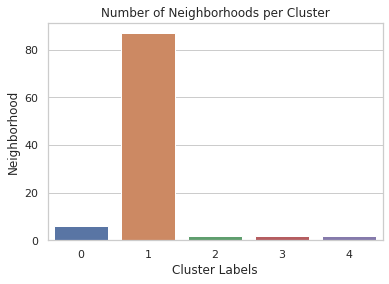

In [131]:
# number of neighborhoods vs cluster
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Cluster Labels", y="Neighborhood", data=neighborhoods_per_cluster)
ax.set_title("Number of Neighborhoods per Cluster")

This shows that Yoga Studios are mostly concentrated on a few neighborhoods. Let's find out which neighborhoods are in cluster 2:

In [141]:
cluster_2 = toronto_merged['Cluster Labels'] == 2
cluster_3 = toronto_merged['Cluster Labels'] == 3
cluster_0 = toronto_merged['Cluster Labels'] == 0

yoga_cluster_2 = toronto_merged[toronto_merged['Cluster Labels'] == 2]
yoga_cluster_3 = toronto_merged[toronto_merged['Cluster Labels'] == 3]
yoga_cluster_0 = toronto_merged[toronto_merged['Cluster Labels'] == 0]

yoga_clusters = pd.concat([yoga_cluster_2, yoga_cluster_3, yoga_cluster_0], ignore_index=True, sort=False)
yoga_clusters

,PostalCode,Borough,Neighborhood,Latitude,Longitude,MarkerColor,Cluster Labels,Yoga Studio
0,M4H,East York,Thorncliffe Park,43.705369,-79.349372,orange,2,0.047619
1,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,green,2,0.050000
2,M5S,Downtown Toronto,"Harbord, University of Toronto",43.662696,-79.400049,lightgreen,3,0.031250
3,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,lightgreen,3,0.032258
4,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,black,0,0.024390
5,M4M,East Toronto,Studio District,43.659526,-79.340923,black,0,0.026316
6,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,lightgreen,0,0.026316
7,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,lightgreen,0,0.023256
8,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,purple,0,0.023256
9,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,purple,0,0.027027


In [ ]:
# plot map from toronto_merged





In [152]:
# Assign colors to the different Cluster Labels in a new column named 'MarkerColor'
labels = list(yoga_clusters['Cluster Labels'])

marker_color = []

for label in labels:
    if label == 2:
        marker_color.append('darkred')
    elif label == 3:
        marker_color.append('red')
    elif label == 0:
        marker_color.append('orange')

yoga_clusters['MarkerColor'] = marker_color
yoga_clusters

,PostalCode,Borough,Neighborhood,Latitude,Longitude,MarkerColor,Cluster Labels,Yoga Studio
0,M4H,East York,Thorncliffe Park,43.705369,-79.349372,darkred,2,0.047619
1,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,darkred,2,0.050000
2,M5S,Downtown Toronto,"Harbord, University of Toronto",43.662696,-79.400049,red,3,0.031250
3,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,red,3,0.032258
4,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,orange,0,0.024390
5,M4M,East Toronto,Studio District,43.659526,-79.340923,orange,0,0.026316
6,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,orange,0,0.026316
7,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,orange,0,0.023256
8,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,orange,0,0.023256
9,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,orange,0,0.027027


## Cluster Analysis

In [155]:
# create map of Toronto using latitude and longitude values,
map_yoga_studios = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood, markercolor in zip(yoga_clusters['Latitude'], 
                                                        yoga_clusters['Longitude'], 
                                                        yoga_clusters['Borough'], 
                                                        yoga_clusters['Neighborhood'],
                                                        yoga_clusters['MarkerColor']
                                                       ):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=markercolor,
        fill=True,
        fill_color=markercolor,
        fill_opacity=0.7,
        parse_html=False).add_to(map_yoga_studios)

map_yoga_studios

## Conlusion

My friend should move to one of this 